In [1]:
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from tslearn.datasets import UCR_UEA_datasets
import os 

In [2]:
dataset='BasicMotions'

In [3]:
X_train,y_train, X_test, y_test=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])
train_y = y_train
test_y=y_test



In [4]:
print(train_x.shape)
print(X_train.shape)

(40, 6, 100)
(40, 100, 6)


In [5]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(train_y.reshape(-1,1))
pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))



In [6]:
n_pred_classes =train_y.shape[1]
print('n pred classes',n_pred_classes) 
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)


n pred classes 4


In [7]:
model = ResNetBaseline(in_channels= X_train.shape[-1], num_pred_classes=n_pred_classes)
fit(model,train_loader,test_loader)
if dataset in os.listdir('../../ClassificationModels/models/'):
    print('Folder exists')
else: 
    os.mkdir(f'../../ClassificationModels/models/{dataset}')
torch.save(model.state_dict(), f'../../ClassificationModels/models/{dataset}/ResNet')

test_preds, ground_truth = get_all_preds(model, test_loader)
ground_truth=np.argmax(ground_truth,axis=1)
#test_preds=np.argmax(test_preds,axis=1)
sns.set(rc={'figure.figsize':(5,4)})
heatmap=confusion_matrix(ground_truth, test_preds)
sns.heatmap(heatmap, annot=True)
plt.savefig(f'../../ClassificationModels/models/{dataset}/ResNet_confusion_matrix.png')
plt.close()
acc= accuracy_score(ground_truth, test_preds)
a = classification_report(ground_truth, test_preds, output_dict=True)
dataframe = pd.DataFrame.from_dict(a)
dataframe.to_csv(f'../../ClassificationModels/models/{dataset}/classification_report.csv', index = False)



Epoch: 1, Train loss: 1.023, Val loss: 1.22
Epoch: 2, Train loss: 1.133, Val loss: 1.059
Epoch: 3, Train loss: 1.008, Val loss: 0.915
Epoch: 4, Train loss: 0.863, Val loss: 0.763
Epoch: 5, Train loss: 0.667, Val loss: 0.571
Epoch: 6, Train loss: 0.42, Val loss: 0.438
Epoch: 7, Train loss: 0.188, Val loss: 0.183
Epoch: 8, Train loss: 0.045, Val loss: 0.231
Epoch: 9, Train loss: 0.008, Val loss: 0.47
Epoch: 10, Train loss: 0.003, Val loss: 0.687
Epoch: 11, Train loss: 0.0, Val loss: 1.355
Epoch: 12, Train loss: 0.11, Val loss: 0.543
Epoch: 13, Train loss: 0.922, Val loss: 0.0
Epoch: 14, Train loss: 1.219, Val loss: 1.474
Epoch: 15, Train loss: 1.971, Val loss: 0.115
Epoch: 16, Train loss: 0.029, Val loss: 2.315
Epoch: 17, Train loss: 0.856, Val loss: 0.847
Epoch: 18, Train loss: 0.281, Val loss: 0.235
Epoch: 19, Train loss: 0.108, Val loss: 0.301
Epoch: 20, Train loss: 0.407, Val loss: 0.176
Epoch: 21, Train loss: 0.06, Val loss: 0.038
Epoch: 22, Train loss: 0.013, Val loss: 0.078
Epoch:

In [8]:
print(train_x.shape)
print(test_x.shape)
print(X_train.shape[-1])

(40, 6, 100)
(40, 6, 100)
6


# Explanation Algo

In [9]:
item=test_x[10].reshape(1,test_x.shape[1],-1)
shape=item.shape
_item=  torch.from_numpy(item).float()
model.eval()
#y_target= model(_item).detach().numpy()
y_target = torch.nn.functional.softmax(model(_item)).detach().numpy()

/home/jacqueline/.local/share/virtualenvs/TSInterpret-NXJYnQDU/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [10]:
print(y_target)

[[2.3197993e-06 9.9999774e-01 1.7537711e-24 6.9020864e-18]]


In [11]:
(train_x,train_y)

(array([[[ 7.9106000e-02,  3.9403200e-01,  5.5144400e-01, ...,
           2.5351840e+00, -3.3992200e-01,  3.7819900e-01],
         [ 1.1718800e-01,  1.2011810e+00, -1.7310900e-01, ...,
           5.3270000e-03, -1.8397600e-01, -9.3760000e-02],
         [-7.0314000e-02, -2.1307000e-02,  6.9248000e-02, ...,
           3.8618900e-01, -1.0653000e-02, -1.8909900e-01],
         [-2.0960000e-01, -1.1763000e-02,  1.7915800e-01, ...,
           6.3297000e-02,  4.3600000e-03,  1.5447600e-01],
         [ 1.0387200e-01,  3.0362400e-01, -1.1444700e-01, ...,
           5.8594000e-02, -2.5778600e-01, -1.6264200e-01],
         [-1.3694300e-01,  4.5277000e-02,  3.4624000e-02, ...,
          -7.9900000e-03, -1.0653000e-02, -3.1960000e-02]],
 
        [[ 3.7775100e-01, -6.1085000e-01, -1.4737600e-01, ...,
          -8.3775400e-01,  2.3379200e-01, -1.6779200e-01],
         [ 7.7238000e-02, -3.8352600e-01, -3.7133800e-01, ...,
           1.3316900e-01, -2.9679600e-01,  6.9763700e-01],
         [-9.5245000e

In [12]:
from TSInterpret.InterpretabilityModels.counterfactual.Ates import BruteForceSearch, OptimizedSearch,AtesCF

#comte = OptimizedSearch(model, train_x, np.argmax(train_y,axis=1), silent=False, threads=1,num_distractors=2)
exp_model= AtesCF(model,(train_x,train_y),backend='PYT',mode='feat', method= 'opt')
#exp_model=NativeGuideCF(model,shape,(train_x,train_y), mode='torch')

2022-07-06 09:20:58.555681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 09:20:58.555698: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
#TODO Brute --> workig but long runttime ? or somehow endless loop 
#TODO KD TRee somehow zero --> checkout 
exp = exp_model.explain(item,0)
#exp=comte.explain(item,to_maximize=np.argmax(y_target,axis=1)[0],savefig=False) #from abc import ABC, abstractmethod#exp_model.explain(item, np.argmax(y_target,axis=1),method='native_guide')

Current may 1
0
Other ()
Best (1, 6, 100)


In [14]:
exp

(array([[[ 2.0614800e-01, -6.5829400e-01,  4.6961200e-01, -1.0653500e-01,
           3.0628800e-01,  9.5082400e-01,  2.0614800e-01, -6.5829400e-01,
           4.6961200e-01, -1.0653500e-01,  3.0628800e-01,  9.5082400e-01,
           6.5343670e+00,  4.5973270e+00, -2.7236610e+00, -4.3945600e-01,
           1.7178750e+00, -1.0413790e+00,  1.1319170e+00, -4.0330930e+00,
           9.9343800e-01,  6.4720000e-01,  7.4574000e-02, -3.3158990e+00,
          -8.3679960e+00, -7.5131520e+00,  3.3468720e+00, -6.8981400e-01,
          -5.9659500e-01, -2.7965410e+00, -1.3497001e+01, -6.1402820e+00,
           1.5261140e+00, -4.3679300e-01,  2.6630000e-03, -9.8278400e-01,
          -7.0870740e+00, -1.0483374e+01, -2.4875880e+00,  2.9643340e+00,
          -9.5348700e-01,  4.4211980e+00,  1.7191908e+01, -1.0542259e+01,
          -3.6504000e+00,  2.5168870e+00,  4.3945600e-01,  8.2191680e+00,
           1.7598858e+01, -3.2541320e+00, -5.0678790e+00,  2.5062340e+00,
           2.7166400e-01,  7.3775420e+

In [15]:
print(exp[0])
array, label=exp
print(label)
print(array)

[[[ 2.0614800e-01 -6.5829400e-01  4.6961200e-01 -1.0653500e-01
    3.0628800e-01  9.5082400e-01  2.0614800e-01 -6.5829400e-01
    4.6961200e-01 -1.0653500e-01  3.0628800e-01  9.5082400e-01
    6.5343670e+00  4.5973270e+00 -2.7236610e+00 -4.3945600e-01
    1.7178750e+00 -1.0413790e+00  1.1319170e+00 -4.0330930e+00
    9.9343800e-01  6.4720000e-01  7.4574000e-02 -3.3158990e+00
   -8.3679960e+00 -7.5131520e+00  3.3468720e+00 -6.8981400e-01
   -5.9659500e-01 -2.7965410e+00 -1.3497001e+01 -6.1402820e+00
    1.5261140e+00 -4.3679300e-01  2.6630000e-03 -9.8278400e-01
   -7.0870740e+00 -1.0483374e+01 -2.4875880e+00  2.9643340e+00
   -9.5348700e-01  4.4211980e+00  1.7191908e+01 -1.0542259e+01
   -3.6504000e+00  2.5168870e+00  4.3945600e-01  8.2191680e+00
    1.7598858e+01 -3.2541320e+00 -5.0678790e+00  2.5062340e+00
    2.7166400e-01  7.3775420e+00  1.2598854e+01  1.2419724e+01
   -7.6344280e+00 -9.5082400e-01 -2.6900100e-01  1.2491220e+00
    1.2065256e+01  1.2156147e+01 -5.8005510e+00 -2.0507

# Plot Item 

In [16]:
plt.style.use("classic")
colors = [
            '#08F7FE',  # teal/cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green
        ]
        
#Figure out number changed channels
##index= np.argwhere(np.any(item!=array,axis=1))
#index
res = (item != array).any(-1)
ind=np.where(res[0])

print(res)
#print(ind[0][0])

[[False  True False False  True False]]


In [17]:
len(ind[0])

2

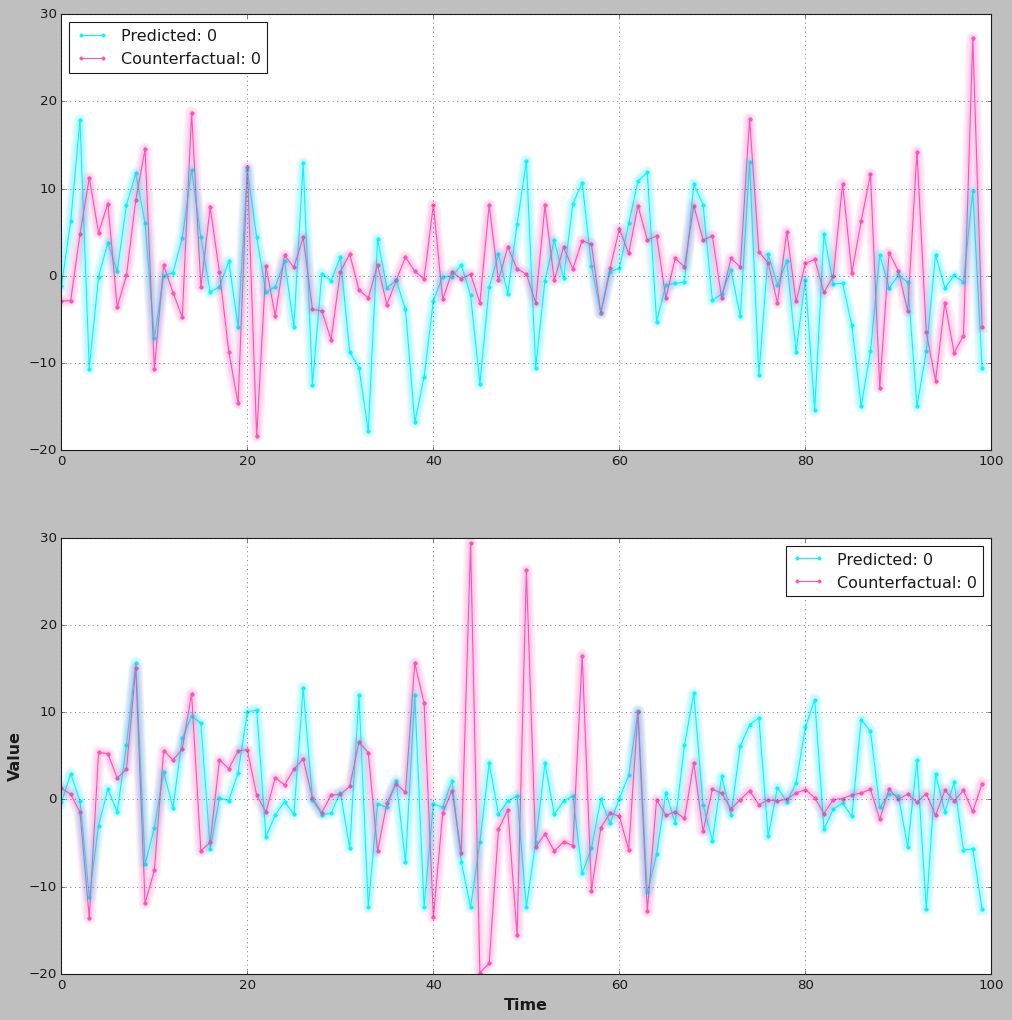

In [18]:
i=0
org_label=0
cf_label=label[0]
exp=array

exp_model.plot_in_one(item,org_label,exp,cf_label)